# Problem 1 编写代码

In [ ]:
import numpy as np
import time

def PLA(T : int,x,y) -> np.ndarray:
    start_time = time.time()
    if T == 0:
        T = 100000
    wt = np.zeros((len(x[0])+1,))
    if isinstance(x,np.ndarray):
        x = x.tolist()
    for xi in x:
        xi.append(1)
    x = np.array(x)
    y = np.array(y)
    for iter in range(T):
        predict = np.sign(wt.dot(x.T))
        miss_predict = np.absolute(predict - y)
        n_iter = miss_predict.argmax(0)
        if predict[n_iter] == y[n_iter]:
            break
        wt = wt + y[n_iter] * x[n_iter]
    end_time = time.time()
    print("PLA:" + str(end_time - start_time))
    return wt

def Pocket(T : int,x,y) -> np.ndarray:
    start_time = time.time()
    if T == 0:
        T = 100000
    wt = np.zeros((len(x[0])+1,))
    w_pocket = np.zeros((len(x[0])+1,))
    error_pocket = len(x)
    if isinstance(x,np.ndarray):
        x = x.tolist()
    for xi in x:
        xi.append(1)
    x = np.array(x)
    y = np.array(y)
    for iter in range(T):
        predict = np.sign(wt.dot(x.T))
        miss_predict = np.absolute(predict - y)
        error_number = np.count_nonzero(miss_predict,axis=0)
        if error_number < error_pocket:
            w_pocket = wt
            error_pocket = error_number
            if error_pocket == 0:
                break
        n_iter = np.random.choice(np.flatnonzero(miss_predict))
        wt = wt + y[n_iter] * x[n_iter]
    end_time = time.time()
    print("Pocket:" + str(end_time - start_time))
    return w_pocket

def gen_data(u10,sigma10,u11,sigma11,u20,sigma20,u21,sigma21,n : int = 200):
    # Since Covariance Matrix = Identity Matrix <=> independent
    x1_0 = np.random.normal(u10,sigma10,n).reshape(n,1)
    x1_1 = np.random.normal(u11,sigma11,n).reshape(n,1)
    x1 = np.concatenate((x1_0,x1_1),axis=1)
    y1 = np.ones((n,))
    x2_0 = np.random.normal(u20,sigma20,n).reshape(n,1)
    x2_1 = np.random.normal(u21,sigma21,n).reshape(n,1)
    x2 = np.concatenate((x2_0, x2_1), axis=1)
    y2 = - np.ones(n,)
    train_set_x = np.concatenate((x1[0:int(0.8 * n),],x2[0:int(0.8 * n),]))
    train_set_y = np.concatenate((y1[0:int(0.8 * n),],y2[0:int(0.8 * n),]))
    test_set_x = np.concatenate((x1[int(0.8 * n):,],x2[int(0.8 * n):,]))
    test_set_y = np.concatenate((y1[int(0.8 * n):, ], y2[int(0.8 * n):, ]))
    return (train_set_x,train_set_y,test_set_x,test_set_y)

def single_test(w,x,y):
    if isinstance(x,np.ndarray):
        x = x.tolist()
    for xi in x:
        xi.append(1)
    x = np.array(x)
    predict = np.sign(w.dot(x.T))
    miss_predict = np.absolute(predict - y)
    error_number = np.count_nonzero(miss_predict, axis=0)
    return 1 - error_number / len(x)

def test(u10,sigma10,u11,sigma11,u20,sigma20,u21,sigma21,n : int = 200):
    train_set_x,train_set_y,test_set_x,test_set_y = gen_data(u10,sigma10,u11,sigma11,u20,sigma20,u21,sigma21,n)
    w_pocket = Pocket(0,train_set_x,train_set_y)
    print("Pocket Accuracy : %f" % single_test(w_pocket,test_set_x,test_set_y))
    w = PLA(0,train_set_x,train_set_y)
    print("PLA Accuracy : %f" % single_test(w,test_set_x,test_set_y))


# Problem 2 产生数据并测试，绘图

In [ ]:
train_set_x,train_set_y,test_set_x,test_set_y = gen_data(-5,1,0,1,0,1,5,1,200)
w_pocket = Pocket(0,train_set_x,train_set_y)
print("Pocket Accuracy : %f" % single_test(w_pocket,test_set_x,test_set_y))
w = PLA(0,train_set_x,train_set_y)
print("PLA Accuracy : %f" % single_test(w,test_set_x,test_set_y))

Pocket:0.0017693042755126953
Pocket Accuracy : 1.000000
PLA:0.0008087158203125
PLA Accuracy : 1.000000


[-6.02616103 -4.30681301  0.        ]
[-7.10432181 -4.46018402  0.        ]


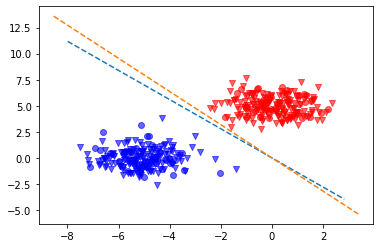

In [ ]:
import matplotlib.pyplot as plt
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
plt.scatter(train_set_x[160:,0], train_set_x[160:,1],c='red',marker='v',alpha=0.6)
plt.scatter(train_set_x[0:160,0], train_set_x[0:160,1],c='blue',marker='v',alpha=0.6)
plt.scatter(test_set_x[40:,0], test_set_x[40:,1],c='red',alpha=0.6)
plt.scatter(test_set_x[0:40,0], test_set_x[0:40,1],c='blue',alpha=0.6)
print(w)
abline(-w[0]/w[1],-w[2]/w[1])
print(w_pocket)
abline(-w_pocket[0]/w_pocket[1],-w_pocket[2]/w[1])
plt.show()

如上图所示，用颜色标记类别，蓝色为X1，红色为X2，形状表示训练样本还是测试样本，倒三角为训练样本，圆形为测试样本。
根据测试结果，在给定的数据集上，PLA和Pocket的正确率均为100%，能够完全正确的分类两类样本。PLA的运行时间为0.0008s，Pocket的运行时间为0.0018s。

# Problem 3 更换数据集


In [ ]:
train_set_x,train_set_y,test_set_x,test_set_y = gen_data(1,1,0,1,0,1,1,1,200)
w_pocket = Pocket(0,train_set_x,train_set_y)
print("Pocket Accuracy : %f" % single_test(w_pocket,test_set_x,test_set_y))
w = PLA(0,train_set_x,train_set_y)
print("PLA Accuracy : %f" % single_test(w,test_set_x,test_set_y))

Pocket:3.7132885456085205
Pocket Accuracy : 0.750000
PLA:0.9444622993469238
PLA Accuracy : 0.487500


[-2.33934579 -2.85735476 10.        ]
[ 3.0251348  -3.82336272  1.        ]


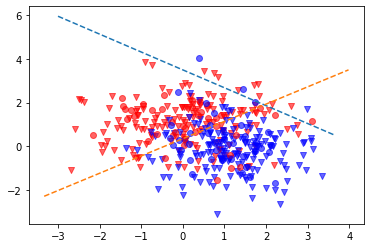

In [ ]:
import matplotlib.pyplot as plt
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
plt.scatter(train_set_x[160:,0], train_set_x[160:,1],c='red',marker='v',alpha=0.6)
plt.scatter(train_set_x[0:160,0], train_set_x[0:160,1],c='blue',marker='v',alpha=0.6)
plt.scatter(test_set_x[40:,0], test_set_x[40:,1],c='red',alpha=0.6)
plt.scatter(test_set_x[0:40,0], test_set_x[0:40,1],c='blue',alpha=0.6)
print(w)
abline(-w[0]/w[1],-w[2]/w[1])
print(w_pocket)
abline(-w_pocket[0]/w_pocket[1],-w_pocket[2]/w[1])
plt.show()

如上图所示，用颜色标记类别，蓝色为X1，红色为X2，形状表示训练样本还是测试样本，倒三角为训练样本，圆形为测试样本。
根据测试结果，在给定的数据集上，PLA的正确率与运行时间分别为49%和0.94s，Pocket的正确率与运行时间分别是75%和3.71s。
可以看到，在给定的线性不可分数据集上，PLA的正确率接近甚至不如瞎蒙的正确率(50%),而Pocket的划分大体上还是能够体现出两类的差距。

# Problem 4 改变数据集与超参数 讨论结果

## 改变数据集

In [ ]:
test(-5,1,0,1,0,1,5,1,1000)

Pocket:0.08552050590515137
Pocket Accuracy : 1.000000
PLA:0.004250049591064453
PLA Accuracy : 0.997500


In [ ]:
test(-5,5,0,5,0,1,5,1,1000)

Pocket:5.576545476913452
Pocket Accuracy : 0.895000
PLA:1.5838708877563477
PLA Accuracy : 0.500000


In [ ]:
test(-5,5,0,5,0,1,5,1,10000)

Pocket:42.01167035102844
Pocket Accuracy : 0.913250
PLA:14.575709581375122
PLA Accuracy : 0.500000


In [ ]:
test(-5,5,0,5,0,4,5,4,1000)

Pocket:5.881703853607178
Pocket Accuracy : 0.792500
PLA:1.5601136684417725
PLA Accuracy : 0.500000


In [ ]:
test(0,5,0,5,0,5,0,5,1000)

Pocket:6.257530450820923
Pocket Accuracy : 0.505000
PLA:1.5788280963897705
PLA Accuracy : 0.507500


根据以上的测试结果，我们可以发现，PLA算法只适用于数据集完全线性可分的情况，当数据集线性不可分时，PLA算法的表现与瞎蒙差不多。
而Pocket算法适用于数据集接近线性可分的情况，而且数据集越线性可分表现越好。当数据集完全没有模式可寻时，Pocket也只能瞎蒙了。

## 改变Pocket的迭代次数


In [ ]:
train_set_x,train_set_y,test_set_x,test_set_y = gen_data(-5,5,0,5,0,3,5,3,2000)
def Pocket_train_and_test(T : int):
    w_pocket = Pocket(T,train_set_x,train_set_y)
    print("Pocket Accuracy : %f" % single_test(w_pocket,test_set_x,test_set_y))

In [ ]:
Pocket_train_and_test(100)

Pocket:0.024615764617919922
Pocket Accuracy : 0.798750


In [ ]:
Pocket_train_and_test(1000)

Pocket:0.1655292510986328
Pocket Accuracy : 0.797500


In [ ]:
Pocket_train_and_test(10000)

Pocket:1.307068109512329
Pocket Accuracy : 0.800000


In [ ]:
Pocket_train_and_test(100000)

Pocket:12.819292545318604
Pocket Accuracy : 0.798750


In [ ]:
Pocket_train_and_test(1000000)

Pocket:128.25879669189453
Pocket Accuracy : 0.797500


经过以上测试，我们发现Pocket在本次产生的测试集上很容易在迭代次数较低时达到它的性能上界，因此可能在实践中，采取较少的迭代次数可能在短时间内达到一个相当优秀的结果。

以上所有运行时间均为Google Colab上测得。